In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from tqdm import tqdm

C:\Users\wogur\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
root = './dataset/'
ct_set = os.path.join(root,'ct_train_test/ct_train/')
mr_set = os.path.join(root,'mr_train_test/mr_train/')

In [3]:
ct_list = os.listdir(ct_set)
ct_images = list()
ct_labels = list()
for ct_l in ct_list:
    if 'image' in ct_l:
        file_path = os.path.join(ct_set, ct_l)
        fn = os.listdir(file_path)
        ct_images.append(nib.load(file_path + '/' + fn[0]))
    elif 'label' in ct_l:
        file_path = os.path.join(ct_set, ct_l)
        fn = os.listdir(file_path)
        ct_labels.append(nib.load(file_path + '/' + fn[0]))

In [4]:
mr_list = os.listdir(mr_set)
mr_images = list()
mr_labels = list()
for mr_l in mr_list:
    if 'image' in mr_l:
        file_path = os.path.join(mr_set, mr_l)
        fn = os.listdir(file_path)
        mr_images.append(nib.load(file_path + '/' + fn[0]))
    elif 'label' in mr_l:
        file_path = os.path.join(mr_set, mr_l)
        fn = os.listdir(file_path)
        mr_labels.append(nib.load(file_path + '/' + fn[0]))

In [5]:
ct_cnt = len(ct_images)
mr_cnt = len(mr_images)

# image shape

In [6]:
ct_size = list()
mr_size = list()
for ct_image in ct_images:
    ct_size.append(ct_image.shape)    
for mr_image in mr_images:
    mr_size.append(mr_image.shape)

In [7]:
ct_size

[(512, 512, 363),
 (512, 512, 239),
 (512, 512, 298),
 (512, 512, 200),
 (512, 512, 177),
 (512, 512, 248),
 (512, 512, 243),
 (512, 512, 222),
 (512, 512, 293),
 (512, 512, 274),
 (512, 512, 239),
 (512, 512, 177),
 (512, 512, 211),
 (512, 512, 358),
 (512, 512, 300),
 (512, 512, 333),
 (512, 512, 283),
 (512, 512, 187),
 (512, 512, 297),
 (512, 512, 363)]

In [8]:
mr_size

[(512, 512, 160),
 (512, 512, 128),
 (288, 288, 160),
 (288, 288, 120),
 (288, 288, 130),
 (256, 256, 160),
 (288, 288, 180),
 (288, 288, 130),
 (512, 512, 120),
 (288, 288, 160),
 (288, 288, 160),
 (512, 512, 128),
 (512, 512, 112),
 (512, 512, 160),
 (340, 340, 200),
 (288, 288, 130),
 (288, 288, 140),
 (288, 288, 150),
 (288, 288, 135),
 (288, 288, 135)]

# image resize

In [9]:
def resizing(img, resize):
    bigsize = max(img.size)
    bg = Image.new('L', (bigsize,bigsize), 0)
    offset = (int(round(((bigsize - img.size[0])/2),0)), int(round(((bigsize - img.size[1])/2),0)))
    bg.paste(img,offset)
    bg = bg.resize((resize,resize))
    return bg

In [10]:
def resizing_3d(images):
    processed_imgs = list()
    for img in tqdm(images):
        resized_img = np.zeros((256,256,img.shape[2]))
        pad_img = np.zeros((256,256,256))
        for i in range(img.shape[2]):
            im = Image.fromarray(img.get_data()[:,:,i])
            resized_img[:,:,i] = np.asarray(im.resize((256,256)))
        for j in range(resized_img.shape[0]):
            im = Image.fromarray(resized_img[j,:,:])
            im =  resizing(im,256)
            pad_img[j,:,:] = np.asarray(im)
        processed_imgs.append(pad_img)
    return processed_imgs

In [11]:
ct_pad_images = resizing_3d(ct_images)
ct_pad_labels = resizing_3d(ct_labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.09it/s]


In [12]:
mr_pad_images = resizing_3d(mr_images)
mr_pad_labels = resizing_3d(mr_labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.70it/s]


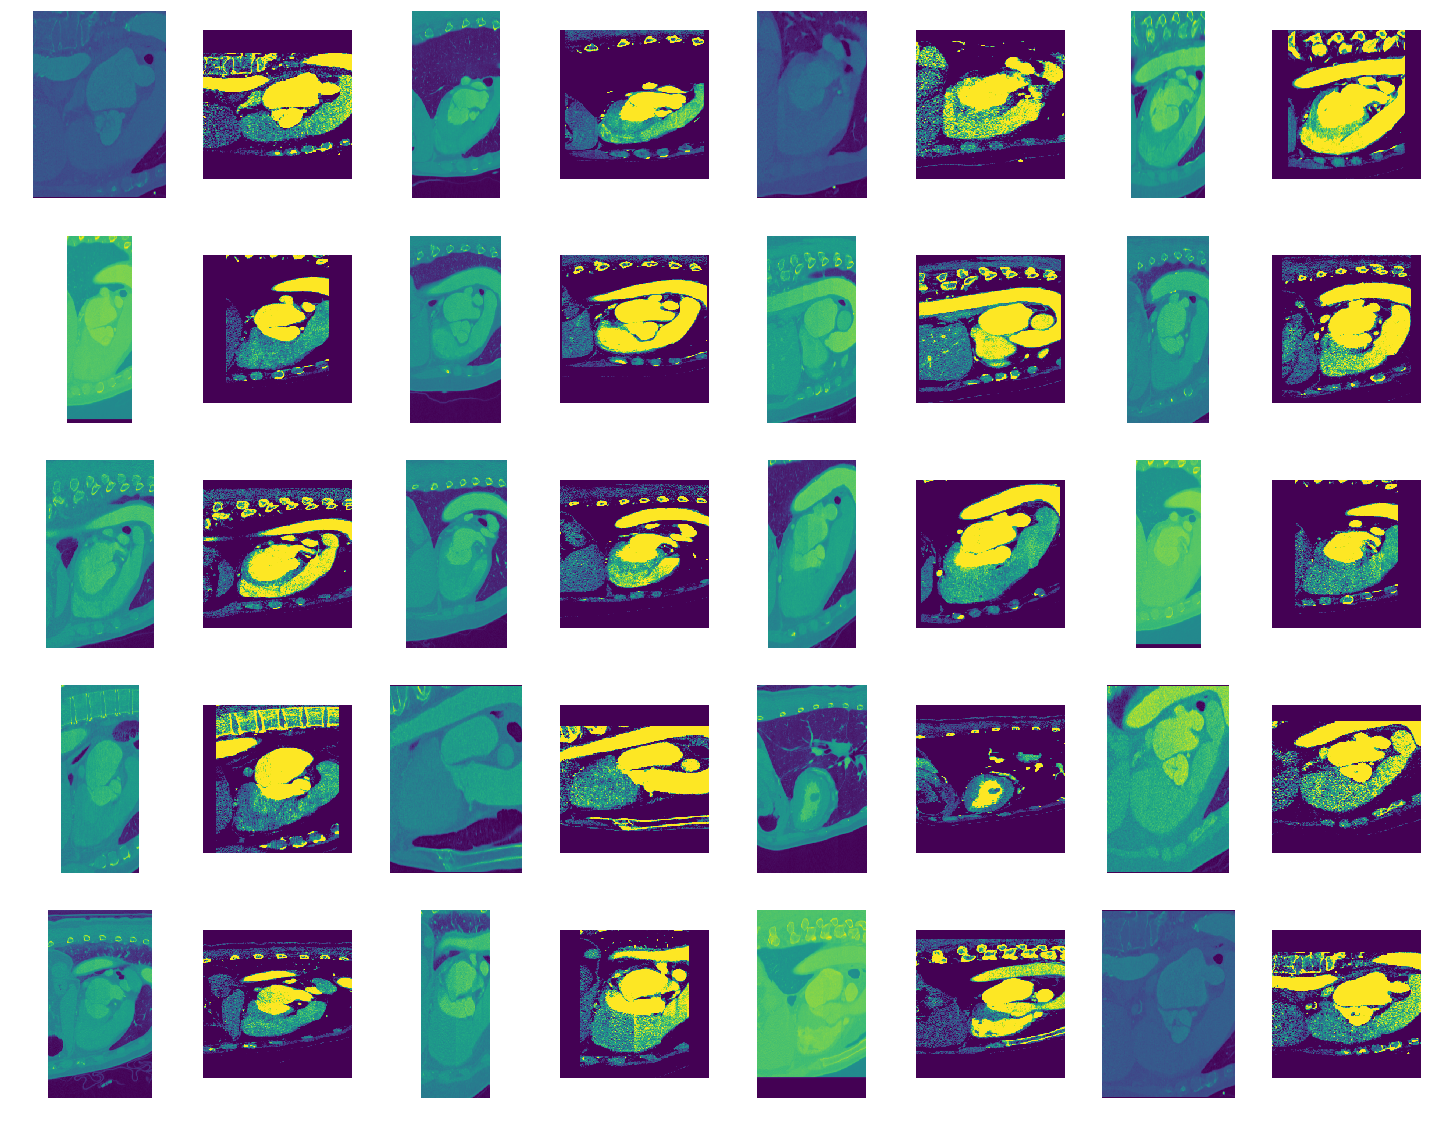

In [13]:
f, ax = plt.subplots(5,8, figsize=(25,20))
img_idx = 0
pad_idx = 0
for i in range(5*8):
    if (i%8)%2==0:
        ax[i//8,i%8].imshow(ct_images[img_idx].get_data()[256,:,:])
        ax[i//8,i%8].axis('off')
        img_idx+=1
    else:
        ax[i//8,i%8].imshow(ct_pad_images[pad_idx][128,:,:])
        ax[i//8,i%8].axis('off')
        pad_idx+=1

In [14]:
print(ct_pad_images[0].shape)
img = nib.Nifti1Image(ct_pad_images[0], affine=np.eye(4))
nib.save(img,'./dataset/ct_imgs.nii')

(256, 256, 256)


In [15]:
print(mr_pad_images[0].shape)
img = nib.Nifti1Image(mr_pad_images[0], affine=np.eye(4))
nib.save(img,'./dataset/mr_imgs.nii')

(256, 256, 256)


In [16]:
print(ct_pad_labels[0].shape)
img = nib.Nifti1Image(ct_pad_labels[0], affine=np.eye(4))
nib.save(img,'./dataset/ct_labels.nii')

(256, 256, 256)


In [17]:
print(mr_pad_labels[0].shape)
img = nib.Nifti1Image(mr_pad_labels[0], affine=np.eye(4))
nib.save(img,'./dataset/mr_labels.nii')

(256, 256, 256)
